In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline 

In [2]:
# to see all the columns when using head() or describe()
pd.set_option('display.max_columns',60)

In [3]:
df = pd.read_csv("kenya_data/diaries_transactions_all.csv", dtype={'account_startclose_balance': str})

# Conclusion:
## These accounts are for the most part closer to borrowings from friends and families, since most of them are payed back at once.
## There also are frequent new borrowings.

In [5]:
wage = df[(df["trx_family_code"]=="ADVANCE")&(df["trx_type_code"]==2750)]

In [7]:
len(wage["account_ids"].unique())

40

## No interests?

In [9]:
wage["account_bsheet_desig"].unique()

array(['Liability'], dtype=object)

In [11]:
wage["trx_prx_purpose"].unique()

array(['6. Closing Balance--End of last DQ',
       '1. Starting balance (today)', '2. New borrowing',
       'DECREASE--Unexplained balance adjustment',
       'INCREASE--Unexplained balance adjustment', '3. Payments',
       '5. Interest accruing'], dtype=object)

In [13]:
len(wage[wage["trx_prx_purpose"]=="5. Interest accruing"]["account_ids"].unique())

3

### Only interests in 3 out of 40 loans advances.

In [20]:
len(wage[wage["trx_prx_purpose"]=="2. New borrowing"]["account_ids"].unique())

36

In [18]:
len(wage[wage["trx_prx_purpose"]=="1. Starting balance (today)"]["account_ids"].unique())

6

In [19]:
len(wage[wage["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment"]["account_ids"].unique())

1

In [15]:
len(wage[wage["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment"]["account_ids"].unique())

6

In [67]:
len(wage[(wage["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")|(wage["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")]["account_ids"].unique())

6

### We would need to discard 6 accounts if we do not want unexplained balance adjustments.

In [16]:
len(wage[wage["trx_prx_purpose"]=="6. Closing Balance--End of last DQ"]["account_ids"].unique())

38

### 2 accounts don't have a closing balance.

In [24]:
clos_bal = []
for acc in wage[wage["trx_prx_purpose"]=="6. Closing Balance--End of last DQ"]["account_ids"].unique():
    clos = wage[(wage["trx_prx_purpose"]=="6. Closing Balance--End of last DQ")&(wage["account_ids"]==acc)]["trx_value_kes"]
    clos_bal.append(clos.values[0])

In [25]:
clos_bal

[300.0,
 4000.0,
 2000.0,
 0.0,
 0.0,
 500.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2000.0,
 0.0,
 3200.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1500.0,
 0.0,
 0.0,
 0.0,
 1000.0,
 0.0,
 0.0,
 1500.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1540.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

## Look at one single account

In [26]:
acc = random.choice(wage["account_ids"].unique())

In [27]:
print(acc)

61135844741100000


acc = 61135844741100000

In [28]:
lna = wage[wage["account_ids"]==acc]

In [35]:
lna.shape

(4, 60)

In [55]:
lna.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr,trx_val_dir,bal_evol
47220,KELDK30,NaN,06sep2012,04nov2013,424,14,04=Diaries Interview,18jan2013,1,2013,2013_01,14sep2012,56135858089800000,NaN,56134406024800000,NaN,Liability,NaN,Informal,NaN,23dec2012,25sep2013,276,9,56135858151700000,56134406024800000,23dec2012,12,2012,2012_12,5.0,108,3,0,0,findev,"Borrowing, lending, savings or insurance media...",ADVANCE,Advance,2750,Wage advance,2. New borrowing,New borrowing on financial liability,0.0,Increase,1.0,Cash,1.0,0.0,09=At home or work (self or collector/agent),Inflow,2000.0,23.529410,0,0,0.0,0.0,3.724138,2000.0,2000.0
247490,KELDK30,NaN,06sep2012,04nov2013,424,14,04=Diaries Interview,18jan2013,1,2013,2013_01,14sep2012,56135858089800000,1.0,56134406024800000,NaN,Liability,NaN,Informal,NaN,23dec2012,25sep2013,276,9,56135858151700000,56134406024800000,23dec2012,12,2012,2012_12,5.0,108,3,0,0,findev,"Borrowing, lending, savings or insurance media...",ADVANCE,Advance,2750,Wage advance,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,09=At home or work (self or collector/agent),Outflow,400.0,4.705883,0,0,0.0,0.0,3.724138,-400.0,1600.0
249414,KELDK30,NaN,06sep2012,04nov2013,424,14,04=Diaries Interview,18jan2013,1,2013,2013_01,14sep2012,56135858089800000,NaN,56134406024800000,NaN,Liability,NaN,Informal,NaN,23dec2012,25sep2013,276,9,56135858147300000,56134406024800000,29dec2012,12,2012,2012_12,5.0,114,3,6,0,findev,"Borrowing, lending, savings or insurance media...",ADVANCE,Advance,2750,Wage advance,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,09=At home or work (self or collector/agent),Outflow,400.0,4.705883,0,0,0.0,0.0,3.931035,-400.0,1200.0
353583,KELDK30,NaN,06sep2012,04nov2013,424,14,04=Diaries Interview,18jan2013,1,2013,2013_01,14sep2012,56135858089800000,NaN,56134406024800000,NaN,Liability,NaN,Informal,NaN,23dec2012,25sep2013,276,9,56135858151700000,56134406024800000,12jan2013,1,2013,2013_01,5.0,128,4,20,0,findev,"Borrowing, lending, savings or insurance media...",ADVANCE,Advance,2750,Wage advance,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,09=At home or work (self or collector/agent),Outflow,400.0,4.705883,0,0,0.0,0.0,4.413793,-400.0,800.0
353604,KELDK30,NaN,06sep2012,04nov2013,424,14,04=Diaries Interview,09may2013,5,2013,2013_05,14sep2012,56135858089800000,NaN,56134406024800000,NaN,Liability,NaN,Informal,NaN,23dec2012,25sep2013,276,9,105136812177500000,56134406024800000,04apr2013,4,2013,2013_04,8.0,210,7,102,3,findev,"Borrowing, lending, savings or insurance media...",ADVANCE,Advance,2750,Wage advance,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,13=Private individual or household,Outflow,300.0,3.529412,0,NaN,NaN,NaN,7.241379,-300.0,500.0


In [29]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [32]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index)+ ":" + row["trx_prx_purpose"])

Error neither increase nor decrease at index21538:6. Closing Balance--End of last DQ


In [33]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [34]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s
lna[["account_ids","trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,account_ids,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
472911,61135844741100000,0,5000.0,2. New borrowing,Inflow,Increase,5000.0,5000.0
472972,61135844741100000,25,6000.0,2. New borrowing,Inflow,Increase,6000.0,11000.0
11946,61135844741100000,284,11000.0,DECREASE--Unexplained balance adjustment,NaN,Decrease,-11000.0,0.0
21538,61135844741100000,285,0.0,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0


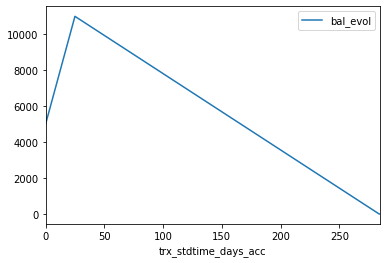

In [36]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## Let's now use a for-loop to get the graphs for all wage advances.

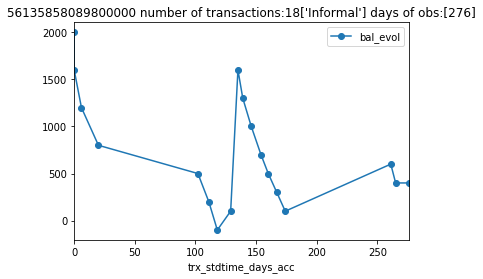

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
47220,108,0,2. New borrowing,Increase,Inflow,2000.0,2000.0,2000.0
247490,108,0,3. Payments,Decrease,Outflow,400.0,-400.0,1600.0
249414,114,6,3. Payments,Decrease,Outflow,400.0,-400.0,1200.0
353583,128,20,3. Payments,Decrease,Outflow,400.0,-400.0,800.0
353604,210,102,3. Payments,Decrease,Outflow,300.0,-300.0,500.0
67446,219,111,3. Payments,Decrease,Outflow,300.0,-300.0,200.0
300739,226,118,3. Payments,Decrease,Outflow,300.0,-300.0,-100.0
196531,237,129,2. New borrowing,Increase,Inflow,200.0,200.0,100.0
360280,243,135,1. Starting balance (today),Increase,NaN,1500.0,1500.0,1600.0
375176,247,139,3. Payments,Decrease,Outflow,300.0,-300.0,1300.0


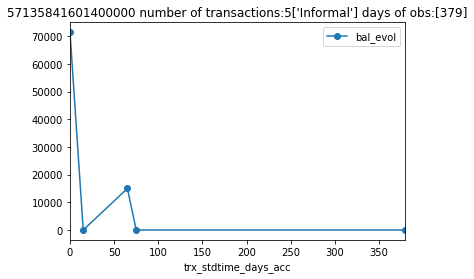

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
801,6,0,1. Starting balance (today),Increase,NaN,71400.0,71400.0,71400.0
464392,21,15,3. Payments,Decrease,Outflow,71400.0,-71400.0,0.0
464569,71,65,2. New borrowing,Increase,Inflow,15000.0,15000.0,15000.0
464108,81,75,3. Payments,Decrease,Outflow,15000.0,-15000.0,0.0
4320,385,379,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


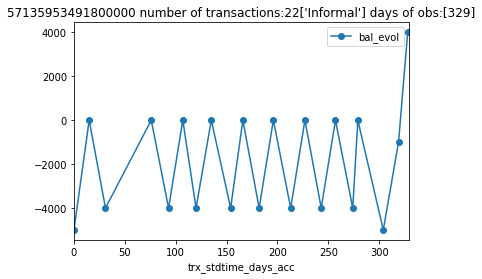

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
470277,56,0,3. Payments,Decrease,Outflow,5000.0,-5000.0,-5000.0
470997,71,15,2. New borrowing,Increase,Inflow,5000.0,5000.0,0.0
474643,87,31,3. Payments,Decrease,Outflow,4000.0,-4000.0,-4000.0
469825,132,76,2. New borrowing,Increase,Inflow,4000.0,4000.0,0.0
469819,149,93,3. Payments,Decrease,Outflow,4000.0,-4000.0,-4000.0
471247,163,107,2. New borrowing,Increase,Inflow,4000.0,4000.0,0.0
470996,176,120,3. Payments,Decrease,Outflow,4000.0,-4000.0,-4000.0
470275,191,135,2. New borrowing,Increase,Inflow,4000.0,4000.0,0.0
471335,210,154,3. Payments,Decrease,Outflow,4000.0,-4000.0,-4000.0
470993,222,166,2. New borrowing,Increase,Inflow,4000.0,4000.0,0.0


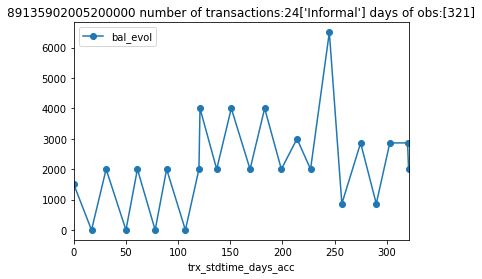

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
420617,45,0,2. New borrowing,Increase,Inflow,1500.0,1500.0,1500.0
447131,62,17,3. Payments,Decrease,Outflow,1500.0,-1500.0,0.0
447790,76,31,2. New borrowing,Increase,Inflow,2000.0,2000.0,2000.0
447112,95,50,3. Payments,Decrease,Outflow,2000.0,-2000.0,0.0
9521,106,61,2. New borrowing,Increase,Inflow,2000.0,2000.0,2000.0
447945,123,78,3. Payments,Decrease,Outflow,2000.0,-2000.0,0.0
450485,134,89,2. New borrowing,Increase,Inflow,2000.0,2000.0,2000.0
445891,152,107,3. Payments,Decrease,Outflow,2000.0,-2000.0,0.0
3661,165,120,2. New borrowing,Increase,Inflow,2000.0,2000.0,2000.0
448710,166,121,2. New borrowing,Increase,Inflow,2000.0,2000.0,4000.0


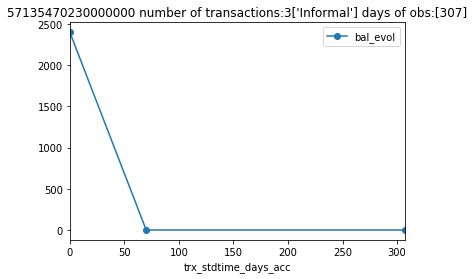

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
478971,68,0,2. New borrowing,Increase,Inflow,2400.0,2400.0,2400.0
457432,138,70,3. Payments,Decrease,Outflow,2400.0,-2400.0,0.0
1477,375,307,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


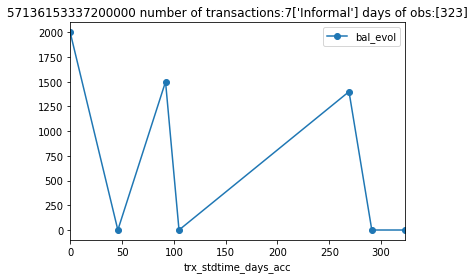

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
457337,69,0,2. New borrowing,Increase,Inflow,2000.0,2000.0,2000.0
458088,115,46,3. Payments,Decrease,Outflow,2000.0,-2000.0,0.0
457190,161,92,2. New borrowing,Increase,Inflow,1500.0,1500.0,1500.0
457187,174,105,3. Payments,Decrease,Outflow,1500.0,-1500.0,0.0
133709,338,269,2. New borrowing,Increase,Inflow,1400.0,1400.0,1400.0
322412,360,291,3. Payments,Decrease,Outflow,1400.0,-1400.0,0.0
1614,392,323,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


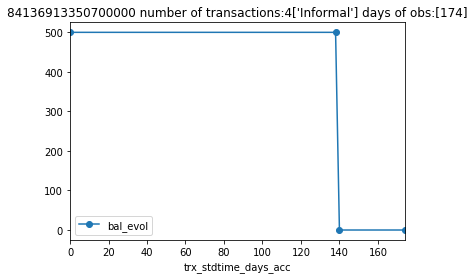

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
189994,291,0,2. New borrowing,Increase,Inflow,500.0,500.0,500.0
25568,429,138,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,500.0
7218,431,140,DECREASE--Unexplained balance adjustment,Decrease,NaN,500.0,-500.0,0.0
1998,465,174,6. Closing Balance--End of last DQ,NaN,NaN,500.0,0.0,0.0


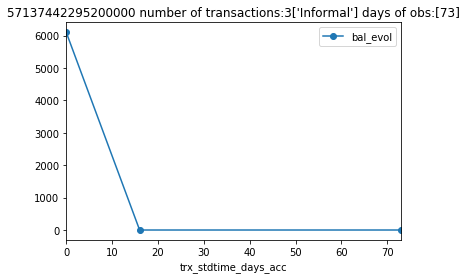

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
482752,313,0,2. New borrowing,Increase,Inflow,6100.0,6100.0,6100.0
482803,329,16,3. Payments,Decrease,Outflow,6100.0,-6100.0,0.0
2150,386,73,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


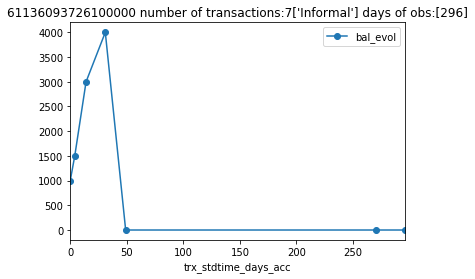

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
295827,109,0,2. New borrowing,Increase,Inflow,1000.0,1000.0,1000.0
295828,113,4,2. New borrowing,Increase,Inflow,500.0,500.0,1500.0
249001,123,14,2. New borrowing,Increase,Inflow,1500.0,1500.0,3000.0
338120,140,31,2. New borrowing,Increase,Inflow,1000.0,1000.0,4000.0
90994,158,49,3. Payments,Decrease,Outflow,4000.0,-4000.0,0.0
17252,379,270,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0
5421,405,296,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


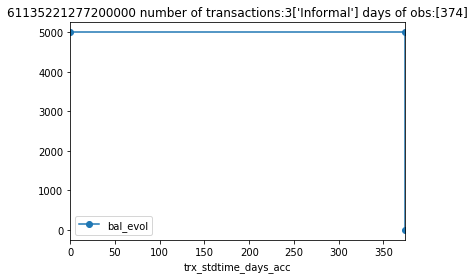

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
189342,37,0,2. New borrowing,Increase,Inflow,5000.0,5000.0,5000.0
5746,411,374,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,5000.0
5747,411,374,DECREASE--Unexplained balance adjustment,Decrease,NaN,5000.0,-5000.0,0.0


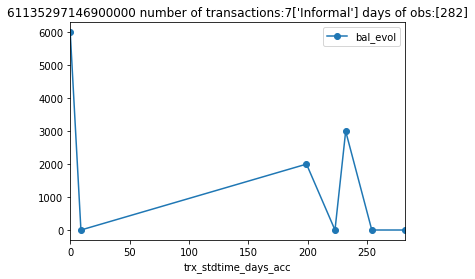

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
482131,108,0,2. New borrowing,Increase,Inflow,6000.0,6000.0,6000.0
454075,117,9,3. Payments,Decrease,Outflow,6000.0,-6000.0,0.0
394231,307,199,2. New borrowing,Increase,Inflow,2000.0,2000.0,2000.0
373247,331,223,3. Payments,Decrease,Outflow,2000.0,-2000.0,0.0
80877,340,232,2. New borrowing,Increase,Inflow,3000.0,3000.0,3000.0
290904,362,254,3. Payments,Decrease,Outflow,3000.0,-3000.0,0.0
5771,390,282,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


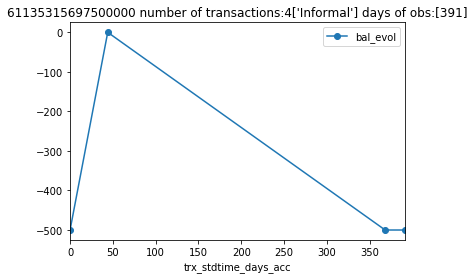

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
406044,3,0,3. Payments,Decrease,Outflow,500.0,-500.0,-500.0
16670,47,44,1. Starting balance (today),Increase,NaN,500.0,500.0,0.0
5784,371,368,DECREASE--Unexplained balance adjustment,Decrease,NaN,500.0,-500.0,-500.0
25316,394,391,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,-500.0


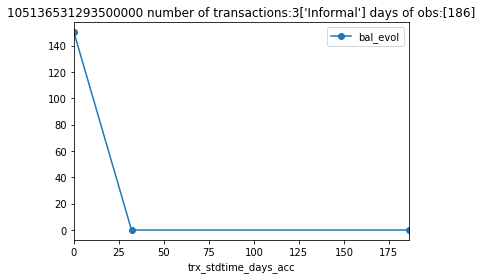

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
6114,192,0,1. Starting balance (today),Increase,NaN,150.0,150.0,150.0
213487,224,32,3. Payments,Decrease,Outflow,150.0,-150.0,0.0
20866,378,186,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


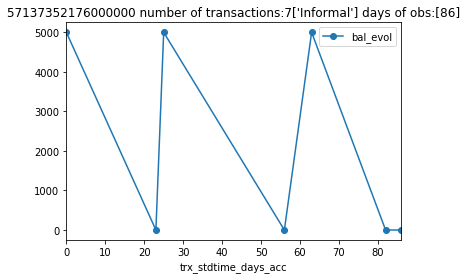

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
473896,310,0,2. New borrowing,Increase,Inflow,5000.0,5000.0,5000.0
476235,333,23,3. Payments,Decrease,Outflow,5000.0,-5000.0,0.0
475159,335,25,2. New borrowing,Increase,Inflow,5000.0,5000.0,5000.0
476767,366,56,3. Payments,Decrease,Outflow,5000.0,-5000.0,0.0
476247,373,63,2. New borrowing,Increase,Inflow,5000.0,5000.0,5000.0
475776,392,82,3. Payments,Decrease,Outflow,5000.0,-5000.0,0.0
6262,396,86,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


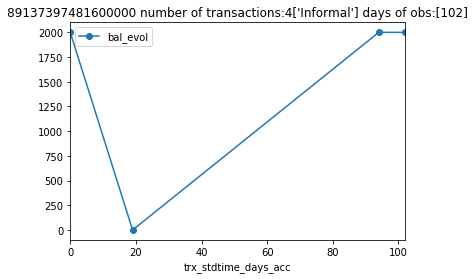

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
65863,252,0,2. New borrowing,Increase,Inflow,2000.0,2000.0,2000.0
448419,271,19,3. Payments,Decrease,Outflow,2000.0,-2000.0,0.0
382949,346,94,2. New borrowing,Increase,Inflow,2000.0,2000.0,2000.0
6465,354,102,6. Closing Balance--End of last DQ,NaN,NaN,2000.0,0.0,2000.0


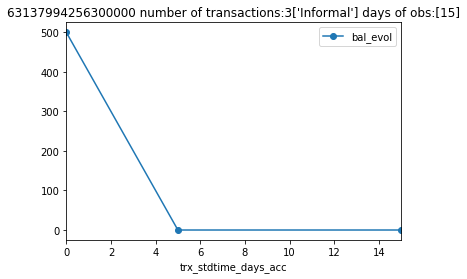

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
194552,352,0,2. New borrowing,Increase,Inflow,500.0,500.0,500.0
317360,357,5,3. Payments,Decrease,Outflow,500.0,-500.0,0.0
6924,367,15,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


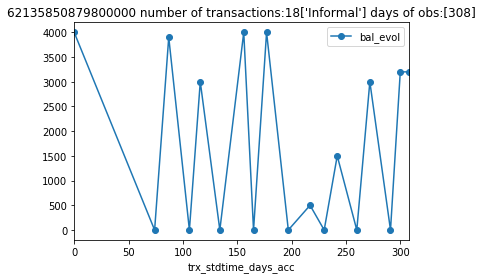

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
8683,111,0,2. New borrowing,Increase,Inflow,4000.0,4000.0,4000.0
437486,185,74,3. Payments,Decrease,Outflow,4000.0,-4000.0,0.0
453096,198,87,2. New borrowing,Increase,Inflow,3900.0,3900.0,3900.0
437469,217,106,3. Payments,Decrease,Outflow,3900.0,-3900.0,0.0
333419,227,116,2. New borrowing,Increase,Inflow,3000.0,3000.0,3000.0
437487,245,134,3. Payments,Decrease,Outflow,3000.0,-3000.0,0.0
314526,267,156,2. New borrowing,Increase,Inflow,4000.0,4000.0,4000.0
437480,276,165,3. Payments,Decrease,Outflow,4000.0,-4000.0,0.0
453094,288,177,2. New borrowing,Increase,Inflow,4000.0,4000.0,4000.0
437481,308,197,3. Payments,Decrease,Outflow,4000.0,-4000.0,0.0


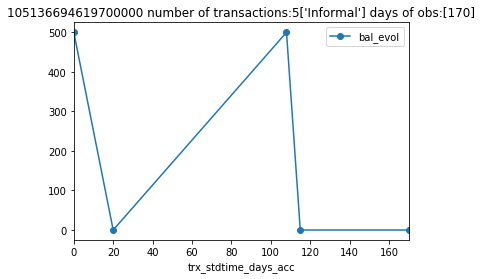

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
271639,205,0,2. New borrowing,Increase,Inflow,500.0,500.0,500.0
383085,225,20,3. Payments,Decrease,Outflow,500.0,-500.0,0.0
381645,313,108,2. New borrowing,Increase,Inflow,500.0,500.0,500.0
263642,320,115,3. Payments,Decrease,Outflow,500.0,-500.0,0.0
7235,375,170,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


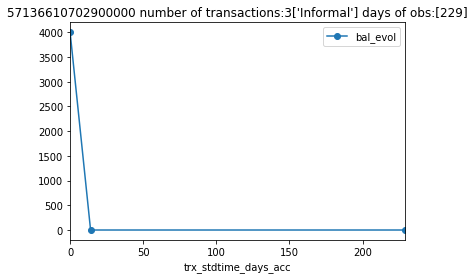

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
475808,167,0,2. New borrowing,Increase,Inflow,4000.0,4000.0,4000.0
473532,181,14,3. Payments,Decrease,Outflow,4000.0,-4000.0,0.0
8163,396,229,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


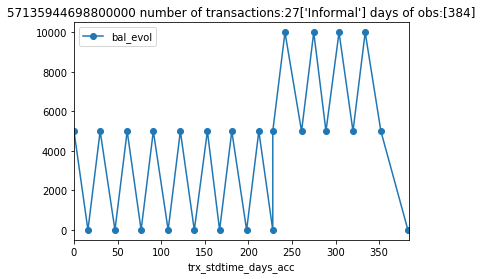

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
471451,29,0,2. New borrowing,Increase,Inflow,5000.0,5000.0,5000.0
471137,45,16,3. Payments,Decrease,Outflow,5000.0,-5000.0,0.0
470850,59,30,2. New borrowing,Increase,Inflow,5000.0,5000.0,5000.0
471037,76,47,3. Payments,Decrease,Outflow,5000.0,-5000.0,0.0
471011,90,61,2. New borrowing,Increase,Inflow,5000.0,5000.0,5000.0
470546,106,77,3. Payments,Decrease,Outflow,5000.0,-5000.0,0.0
470190,120,91,2. New borrowing,Increase,Inflow,5000.0,5000.0,5000.0
470725,137,108,3. Payments,Decrease,Outflow,5000.0,-5000.0,0.0
474203,151,122,2. New borrowing,Increase,Inflow,5000.0,5000.0,5000.0
470983,167,138,3. Payments,Decrease,Outflow,5000.0,-5000.0,0.0


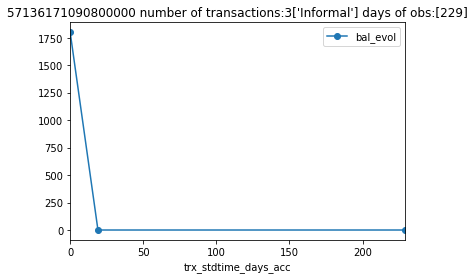

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
457463,161,0,2. New borrowing,Increase,Inflow,1800.0,1800.0,1800.0
8980,180,19,3. Payments,Decrease,Outflow,1800.0,-1800.0,0.0
12543,390,229,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


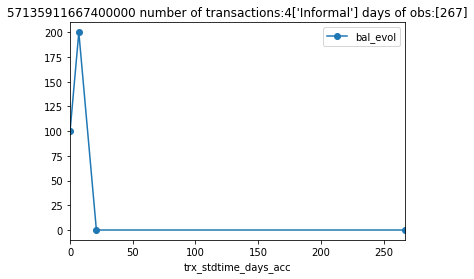

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
283233,128,0,2. New borrowing,Increase,Inflow,100.0,100.0,100.0
457530,135,7,2. New borrowing,Increase,Inflow,100.0,100.0,200.0
9358,149,21,3. Payments,Decrease,Outflow,200.0,-200.0,0.0
9647,395,267,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


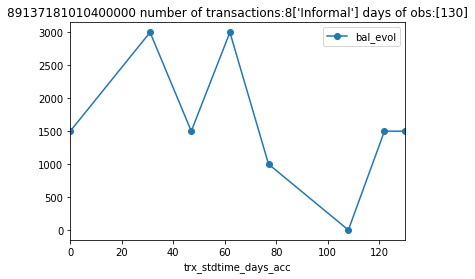

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
213174,225,0,2. New borrowing,Increase,Inflow,1500.0,1500.0,1500.0
379581,256,31,2. New borrowing,Increase,Inflow,1500.0,1500.0,3000.0
446657,272,47,3. Payments,Decrease,Outflow,1500.0,-1500.0,1500.0
59867,287,62,2. New borrowing,Increase,Inflow,1500.0,1500.0,3000.0
480051,302,77,3. Payments,Decrease,Outflow,2000.0,-2000.0,1000.0
450945,333,108,3. Payments,Decrease,Outflow,1000.0,-1000.0,0.0
318889,347,122,2. New borrowing,Increase,Inflow,1500.0,1500.0,1500.0
9817,355,130,6. Closing Balance--End of last DQ,NaN,NaN,1500.0,0.0,1500.0


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


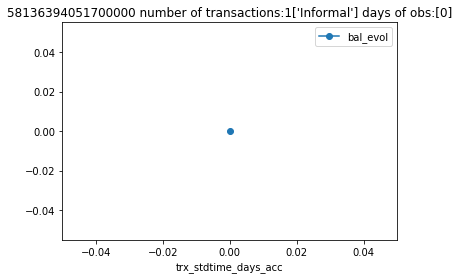

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
11669,372,0,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


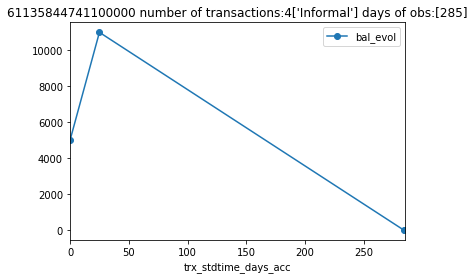

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
472911,91,0,2. New borrowing,Increase,Inflow,5000.0,5000.0,5000.0
472972,116,25,2. New borrowing,Increase,Inflow,6000.0,6000.0,11000.0
11946,375,284,DECREASE--Unexplained balance adjustment,Decrease,NaN,11000.0,-11000.0,0.0
21538,376,285,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


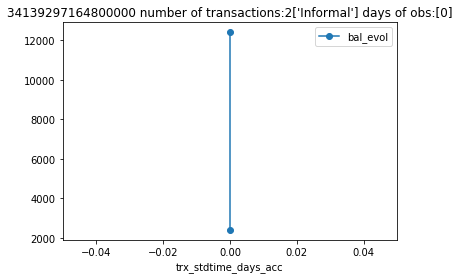

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
14903,327,0,5. Interest accruing,Increase,NaN,2400.0,2400.0,2400.0
340588,327,0,2. New borrowing,Increase,Inflow,10000.0,10000.0,12400.0


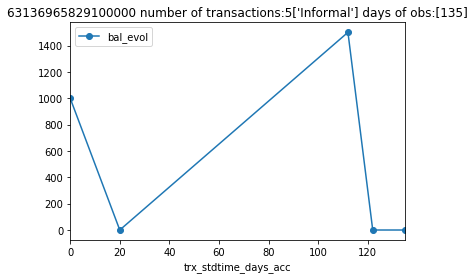

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
334204,224,0,2. New borrowing,Increase,Inflow,1000.0,1000.0,1000.0
380331,244,20,3. Payments,Decrease,Outflow,1000.0,-1000.0,0.0
94373,336,112,2. New borrowing,Increase,Inflow,1500.0,1500.0,1500.0
380333,346,122,3. Payments,Decrease,Outflow,1500.0,-1500.0,0.0
15102,359,135,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


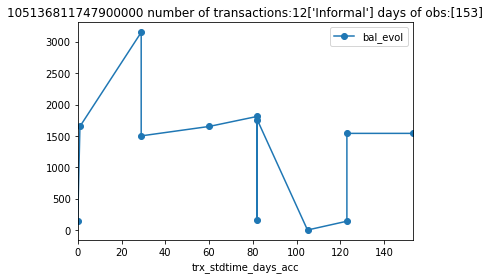

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
435378,224,0,5. Interest accruing,Increase,NaN,150.0,150.0,150.0
435111,225,1,2. New borrowing,Increase,Inflow,1500.0,1500.0,1650.0
433158,253,29,2. New borrowing,Increase,Inflow,1500.0,1500.0,3150.0
433656,253,29,3. Payments,Decrease,Outflow,1650.0,-1650.0,1500.0
25730,284,60,5. Interest accruing,Increase,NaN,150.0,150.0,1650.0
17516,306,82,5. Interest accruing,Increase,NaN,160.0,160.0,1810.0
433136,306,82,3. Payments,Decrease,Outflow,1650.0,-1650.0,160.0
434879,306,82,2. New borrowing,Increase,Inflow,1600.0,1600.0,1760.0
434008,329,105,3. Payments,Decrease,Outflow,1760.0,-1760.0,0.0
15352,347,123,5. Interest accruing,Increase,NaN,140.0,140.0,140.0


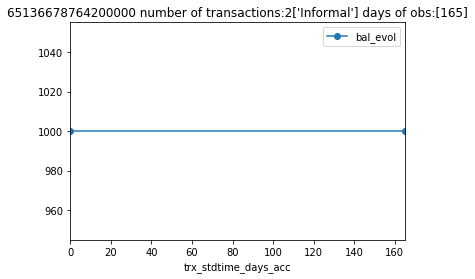

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
30924,199,0,2. New borrowing,Increase,Inflow,1000.0,1000.0,1000.0
15745,364,165,6. Closing Balance--End of last DQ,NaN,NaN,1000.0,0.0,1000.0


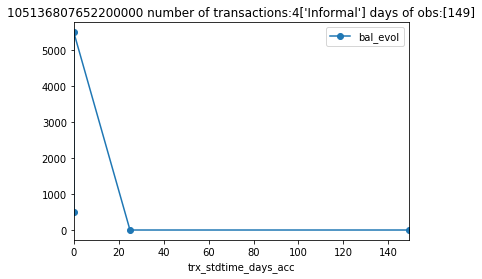

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
17829,247,0,5. Interest accruing,Increase,NaN,500.0,500.0,500.0
434175,247,0,2. New borrowing,Increase,Inflow,5000.0,5000.0,5500.0
433663,272,25,3. Payments,Decrease,Outflow,5500.0,-5500.0,0.0
15828,396,149,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


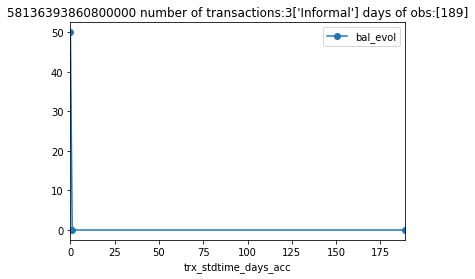

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
239759,183,0,2. New borrowing,Increase,Inflow,50.0,50.0,50.0
239758,184,1,3. Payments,Decrease,Outflow,50.0,-50.0,0.0
16084,372,189,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


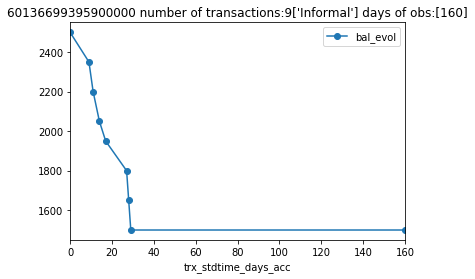

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
300943,208,0,2. New borrowing,Increase,Inflow,2500.0,2500.0,2500.0
408466,217,9,3. Payments,Decrease,Outflow,150.0,-150.0,2350.0
278577,219,11,3. Payments,Decrease,Outflow,150.0,-150.0,2200.0
381788,222,14,3. Payments,Decrease,Outflow,150.0,-150.0,2050.0
109939,225,17,3. Payments,Decrease,Outflow,100.0,-100.0,1950.0
26753,235,27,3. Payments,Decrease,Outflow,150.0,-150.0,1800.0
168729,236,28,3. Payments,Decrease,Outflow,150.0,-150.0,1650.0
98612,237,29,3. Payments,Decrease,Outflow,150.0,-150.0,1500.0
16934,368,160,6. Closing Balance--End of last DQ,NaN,NaN,1500.0,0.0,1500.0


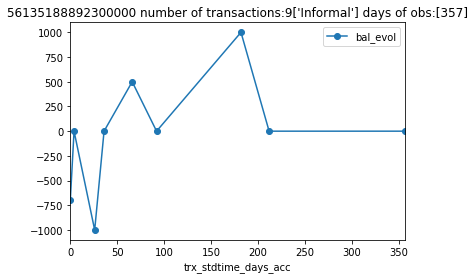

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
314958,22,0,3. Payments,Decrease,Outflow,700.0,-700.0,-700.0
232416,26,4,2. New borrowing,Increase,Inflow,700.0,700.0,0.0
396386,48,26,3. Payments,Decrease,Outflow,1000.0,-1000.0,-1000.0
347277,58,36,2. New borrowing,Increase,Inflow,1000.0,1000.0,0.0
146197,88,66,2. New borrowing,Increase,Inflow,500.0,500.0,500.0
341346,114,92,3. Payments,Decrease,Outflow,500.0,-500.0,0.0
200560,204,182,2. New borrowing,Increase,Inflow,1000.0,1000.0,1000.0
347279,234,212,3. Payments,Decrease,Outflow,1000.0,-1000.0,0.0
17176,379,357,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


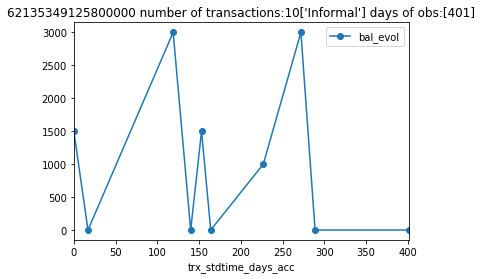

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
17373,17,0,1. Starting balance (today),Increase,NaN,1500.0,1500.0,1500.0
447087,34,17,3. Payments,Decrease,Outflow,1500.0,-1500.0,0.0
480492,136,119,2. New borrowing,Increase,Inflow,3000.0,3000.0,3000.0
449243,157,140,3. Payments,Decrease,Outflow,3000.0,-3000.0,0.0
445682,170,153,2. New borrowing,Increase,Inflow,1500.0,1500.0,1500.0
446010,181,164,3. Payments,Decrease,Outflow,1500.0,-1500.0,0.0
65692,244,227,2. New borrowing,Increase,Inflow,1000.0,1000.0,1000.0
445680,289,272,2. New borrowing,Increase,Inflow,2000.0,2000.0,3000.0
39949,306,289,3. Payments,Decrease,Outflow,3000.0,-3000.0,0.0
25583,418,401,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


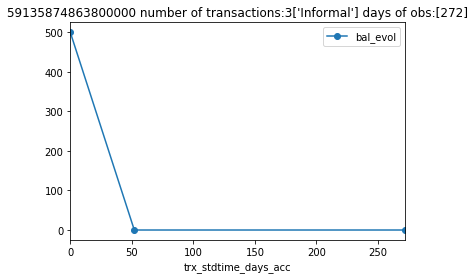

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
106910,83,0,2. New borrowing,Increase,Inflow,500.0,500.0,500.0
297666,135,52,3. Payments,Decrease,Outflow,500.0,-500.0,0.0
22546,355,272,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


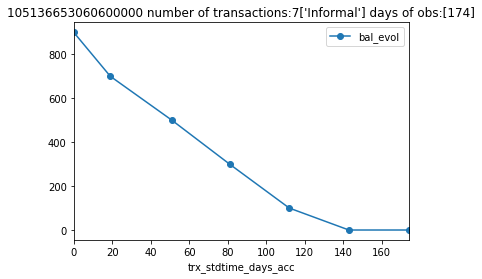

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
237264,208,0,2. New borrowing,Increase,Inflow,900.0,900.0,900.0
159798,227,19,3. Payments,Decrease,Outflow,200.0,-200.0,700.0
191846,259,51,3. Payments,Decrease,Outflow,200.0,-200.0,500.0
119424,289,81,3. Payments,Decrease,Outflow,200.0,-200.0,300.0
201661,320,112,3. Payments,Decrease,Outflow,200.0,-200.0,100.0
211926,351,143,3. Payments,Decrease,Outflow,100.0,-100.0,0.0
24541,382,174,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


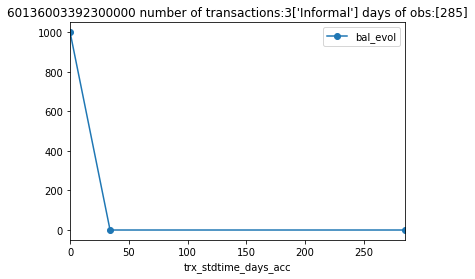

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
168466,81,0,1. Starting balance (today),Increase,NaN,1000.0,1000.0,1000.0
186166,115,34,3. Payments,Decrease,Outflow,1000.0,-1000.0,0.0
25314,366,285,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


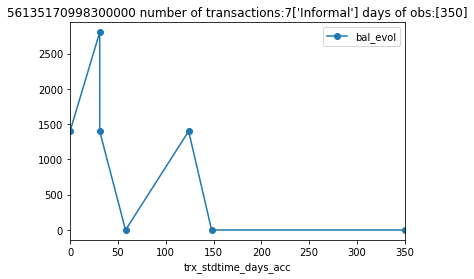

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
435113,44,0,2. New borrowing,Increase,Inflow,1400.0,1400.0,1400.0
435575,75,31,2. New borrowing,Increase,Inflow,1400.0,1400.0,2800.0
459331,75,31,3. Payments,Decrease,Outflow,1400.0,-1400.0,1400.0
459329,102,58,3. Payments,Decrease,Outflow,1400.0,-1400.0,0.0
347265,168,124,2. New borrowing,Increase,Inflow,1400.0,1400.0,1400.0
459333,192,148,3. Payments,Decrease,Outflow,1400.0,-1400.0,0.0
25656,394,350,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


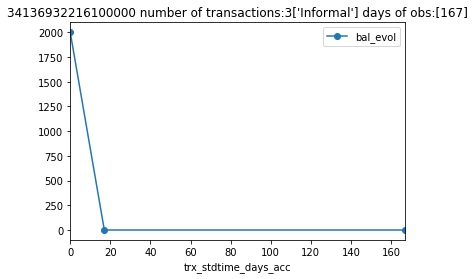

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
115328,193,0,2. New borrowing,Increase,Inflow,2000.0,2000.0,2000.0
295490,210,17,3. Payments,Decrease,Outflow,2000.0,-2000.0,0.0
25784,360,167,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


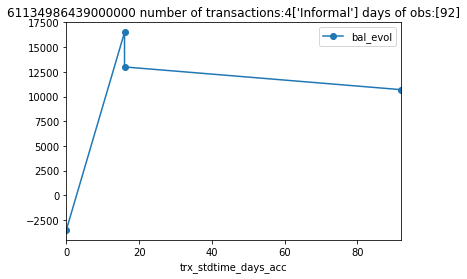

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
463919,31,0,3. Payments,Decrease,Outflow,3500.0,-3500.0,-3500.0
278688,47,16,2. New borrowing,Increase,Inflow,20000.0,20000.0,16500.0
463654,47,16,3. Payments,Decrease,Outflow,3500.0,-3500.0,13000.0
463970,123,92,3. Payments,Decrease,Outflow,2300.0,-2300.0,10700.0


In [63]:
for acc in wage["account_ids"].unique():
    lna = wage[wage["account_ids"]==acc]
    lna = lna.sort_values("trx_stdtime_days_acc")
    
    #add transaction with direction for account
    lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))
    for index, row in lna.iterrows():
        if lna.loc[index,"trx_bsheet_direction"]=="Increase":
            lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
        elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
            lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
        elif row["trx_prx_purpose"]!="6. Closing Balance--End of last DQ":
            print("Error neither increase nor decrease, nor closing balance at index" + str(index) + ".")
    
    #add balance evolution
    lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))
    
    s=0
    for index,row in lna.iterrows():
        s+=lna.loc[index,"trx_val_dir"]
        lna.at[index,"bal_evol"]=s
        
    
    lna.plot(x="trx_stdtime_days_acc",y="bal_evol",marker='o', title=acc + " number of transactions:"+ str(lna.shape[0]) + str(lna["account_formal"].unique())+ " days of obs:" + str(lna["tot_acc_daysofobs"].unique()))
    plt.show()
    display(lna[["trx_stdtime_days_hh","trx_stdtime_days_acc","trx_prx_purpose","trx_bsheet_direction","trx_direction","trx_value_kes","trx_val_dir","bal_evol"]])
    
    